<!--NOTEBOOK_HEADER-->
*Questo notebook, sulla base dei dati pubblicati dalla Protezione Civile, esegue un fit non lineare al modello logistico e quindi confronta le variazioni giornaliere del contagio Covid-19 (nel Veneto) con la funzione derivata associata ai medesimi parametri.<br>
Si veda [matematica.unibocconi.it](http://matematica.unibocconi.it/) per l'articolo completo.*

<p><i>Preleva questo notebook da GitHub oppure clic sul pulsante sopra</i></p> <a href="https://github.com/lrnzr/didattica/blob/master/deltaRegione.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# Calcolo delle variazioni giornaliere e confronto con la curva derivata

In [2]:
# librerie utilizzate
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Vengono definite la funzione logistica (il modello) sulla quale viene effettuato il fit per determinare i valori ottimali dei parametri *a*, *b*, *c*. Quindi sulla base di tali valori si rappresenta la funzione derivata e la si confronta con le variazioni del contagio rilevate giornalmente.

$$f(t)=\frac{a}{1+b e^{-ct}},\qquad f'(t)=\frac{a b c\, e^{-ct}}{(1+b e^{-ct})^2}$$

In [3]:
# definizione della funzione logistica
def logistica(t, a, b, c):
    return a / (1 + b * np.exp(-c * t))
# e della sua derivata
def derivata(t, a, b, c):
    return a * b * c * np.exp(-c * t) / (1 + b * np.exp(-c * t)) ** 2

Il nome del file è composto dal prefisso "datiRegionali" e dalla data in formato ISO. A seconda del file dati da elaborare presente nella cartella di questo notebook, aggiornare eventualmente la data.

In [4]:
# modificare tale data
dataISO = '20200602'
# composizione del nome del file
nomeFile = 'datiRegionali' + dataISO

# utilizzata nel grafico finale
codificaItaliana = dataISO[6:] + '-' + dataISO[4:6] + '-' + dataISO[:4]

Lettura del file e inserimento dei dati nell'array ydata

In [5]:
# viene letto il file json
with open(nomeFile + '.json') as f:
    dati = json.load(f)

# si estraggono i dati corrispondenti a "totale_casi" della regione Veneto. Inserire, eventualmente, altra regione.
ydata = []
for elemento in dati:
    if elemento['denominazione_regione'] == "Veneto":
        ydata.append(elemento['totale_casi'])

Calcolo delle variazioni giornaliere (sebbene presenti nel file origine)

In [6]:
# calcolo delle variazioni giornaliere
ypostData = np.roll(ydata, -1)
delta = ypostData - ydata
variazioni = delta[:-1]

numGiorni = len(ydata)
giorni = np.linspace(1, numGiorni - 1, numGiorni - 1)

Creata la corrispondente successione dei giorni, viene eseguito il fit

In [7]:
xdata = np.linspace(1, numGiorni, numGiorni)
param, covarianza = curve_fit(logistica, xdata, ydata)

Istruzioni per la predisposizione del grafico finale e sue dimensioni

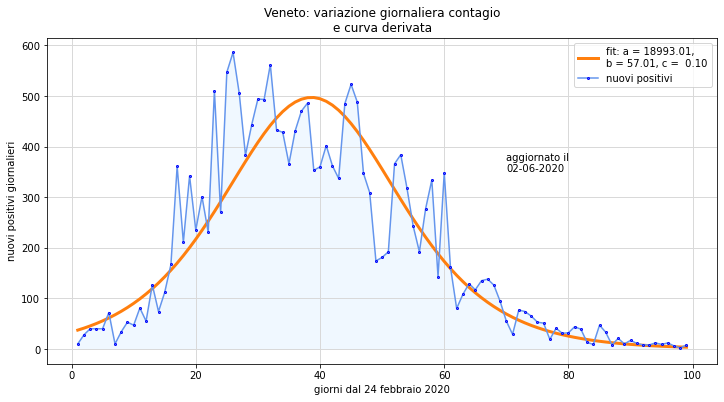

In [11]:
# predispone la figura e il grafico dei singoli dati
plt.rcParams['figure.figsize'] = [12, 6]
# plt.rcParams['figure.dpi'] = 80
fig, ax = plt.subplots()

# label della curva derivata
labs = 'fit: a = %5.2f,\nb = %5.2f, c = %5.2f' % tuple(param)
# grafico della curva derivata
plt.plot(giorni, derivata(
    giorni, param[0], param[1], param[2]), 'C1', linewidth=3., label=labs)


ax.plot(giorni, variazioni, marker='o', markersize=2, mec='b',
        color='cornflowerblue', label='nuovi positivi')
ax.fill_between(giorni, 0, variazioni, where=variazioni >
                0, facecolor='aliceblue')
ax.set_title('Veneto: variazione giornaliera contagio\ne curva derivata')
ax.set_xlabel('giorni dal 24 febbraio 2020')
ax.set_ylabel('nuovi positivi giornalieri')
ax.grid(color='.85', linestyle='-', linewidth=1)
ax.text(70, 350, 'aggiornato il\n' + codificaItaliana)

plt.legend()
plt.show()
# plt.savefig('deltaVeneto.pdf')